## DynamicEarthnet Challenge

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Sentitnel 2 Costa Rica

In [73]:
ls imagery/dynearthnet/2196_3885_13/

2196_3885_13_2018_01.tif
2196_3885_13_2018_02.tif
2196_3885_13_2018_03.tif
2196_3885_13_2018_04.tif
2196_3885_13_2018_05.tif
2196_3885_13_2018_06.tif
2196_3885_13_2018_07.tif
2196_3885_13_2018_08.tif
2196_3885_13_2018_09.tif
2196_3885_13_2018_10.tif
2196_3885_13_2018_11.tif
2196_3885_13_2018_12.tif
2196_3885_13_2019_01.tif
2196_3885_13_2019_02.tif
2196_3885_13_2019_03.tif
2196_3885_13_2019_04.tif
2196_3885_13_2019_05.tif
2196_3885_13_2019_06.tif
2196_3885_13_2019_07.tif
2196_3885_13_2019_08.tif
2196_3885_13_2019_09.tif
2196_3885_13_2019_10.tif
2196_3885_13_2019_11.tif
2196_3885_13_2019_12.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap_em.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif


### Firts two images

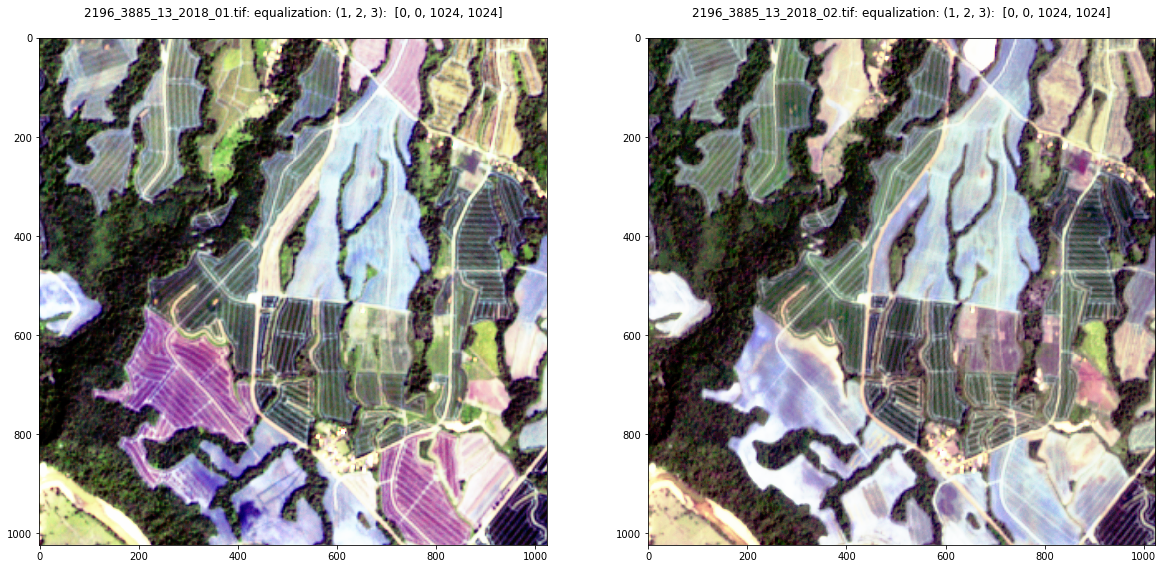

In [74]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif  -e 4 -p [1,2,3] \
-F imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif -E 4 -P [1,2,3]

### Run iMAD on all 10 bands

------------IRMAD -------------
Mon Mar 15 13:42:39 2021
first scene:  imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif
second scene: imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif
rho: [0.99954981 0.99651253 0.96658379 0.94348496 0.91705704 0.87111515
 0.84506881 0.6886884  0.55183011 0.50911117]
result written to: imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
elapsed time: 55.618175745010376


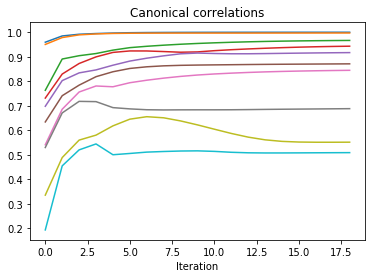

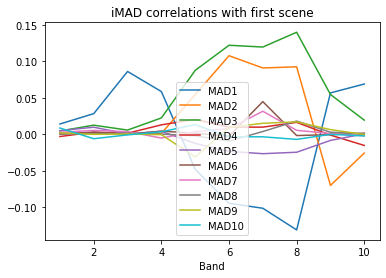

In [75]:
%run scripts/iMad  imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif \
imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif

### Threshold change at 0.0001

In [76]:
%run scripts/iMadmap imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif 0.0001

change map written to: imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif


### Display first  MAD band

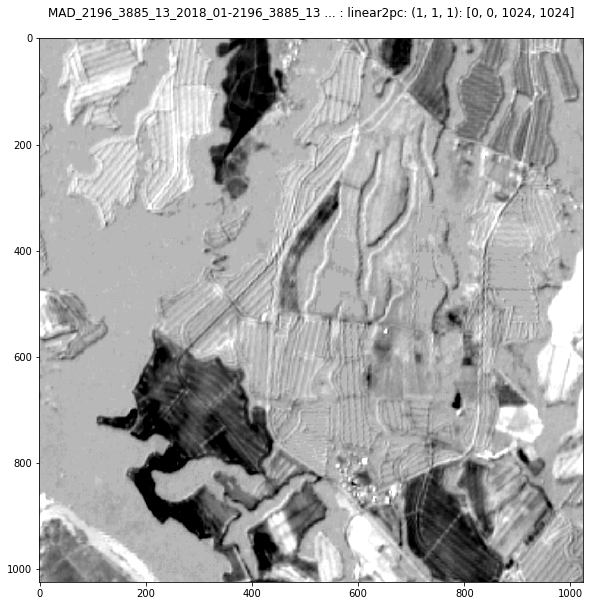

In [77]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif \
-e 3 -p [1,1,1]

### Run EM clustering on all 10 MADs  with 4 clusters (11th band is chisqr)

In [78]:
%run scripts/em -K 4 -p [1,2,3,4,5,6,7,8,9,10] imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif

--------------------------
     EM clustering
--------------------------
infile:   imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
clusters: 4
T0:       0.500000
beta:     0.500000
scale:    2
running EM on 65536 pixel vectors
em iteration 0: dU: 0.954546 loglike: -102925.593064
em iteration 10: dU: 0.960765 loglike: -15531.898426
em iteration 20: dU: 0.962215 loglike: -11370.487651
em iteration 30: dU: 0.790704 loglike: -10195.586116
em iteration 40: dU: 0.320871 loglike: -10175.674951
em iteration 50: dU: 0.055126 loglike: -10200.225962
em iteration 60: dU: 0.014400 loglike: -10220.094167
em iteration 70: dU: 0.008719 loglike: -10232.528155
em iteration 80: dU: 0.004950 loglike: -10240.069060
em iteration 90: dU: 0.002835 loglike: -10244.593518
em iteration 100: dU: 0.001631 loglike: -10247.311487
em iteration 110: dU: 0.000953 loglike: -10248.950020
running EM on 262144 pixel vectors
em iteration 0: dU: 1.000000 loglike: -131179.817611
em iteration

### Display the change map

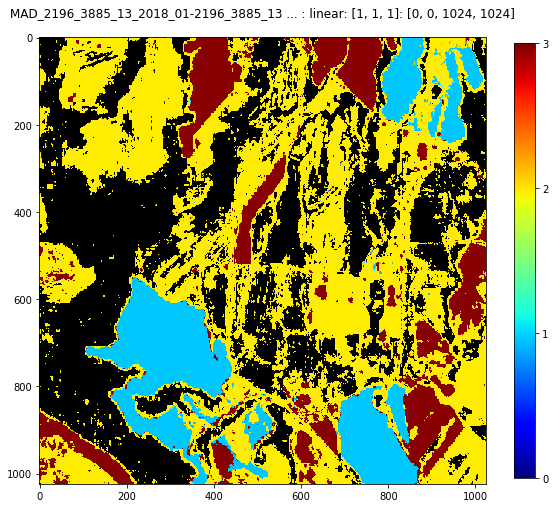

In [79]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif -c

###  3D  Plot of change/no change clusters

In [19]:
import numpy as np
import random
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def pltclusters(imadfile,emfile,num=500,clusters=None):
    ''' Make a 3d plot of two em clusters '''
    # read the first 3 iMAD bands into array imad and classified image into array em
    gdal.AllRegister()
    inDataset = gdal.Open(imadfile,GA_ReadOnly)
    cols = inDataset.RasterXSize
    rows = inDataset.RasterYSize    
    bands = inDataset.RasterCount
    imad = np.zeros((rows*cols,3))
    for b in range(3):
        band = inDataset.GetRasterBand(b+1)
        imad[:,b] = band.ReadAsArray(0,0,cols,rows).astype(float).ravel()
    inDataset = None    
    inDataset = gdal.Open(emfile,GA_ReadOnly)
    band = inDataset.GetRasterBand(1)
    em = band.ReadAsArray(0,0,cols,rows).ravel()
    inDataset = None
    k = np.max(em)
    if clusters==None:
        clusters = range(0,min(4,k))
    else:
        for i in range(len(clusters)):
            clusters[i] -= 1 
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax = fig.gca(projection='3d')
    colors = ['black','red','green','cyan','blue']
    labels = ['no change','change2','change3','change4','change5']
    alpha = [1,0.4,0.4,0.4,0.4]
    for i in clusters:       
        idx = np.where(em==(i+1))[0]       
        random.shuffle(idx)      
        idx = idx[:num]
        ax.scatter(imad[idx,0], imad[idx,1], imad[idx,2], alpha=alpha[i], s=10, c=colors[i], label=labels[i])
    plt.title('iMAD clusters')
    plt.legend(loc=2)
    plt.show()  

### 3D scatterplot of the change clusters. Black cluster (no change) is obscured

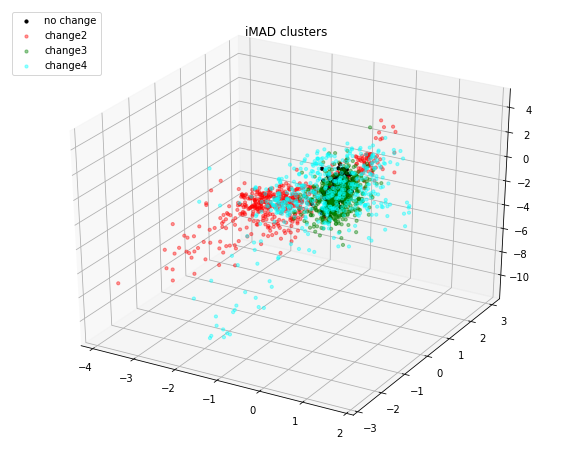

In [20]:
pltclusters('imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif', 
            'imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif',num = 500)    

## Planet O'Brien

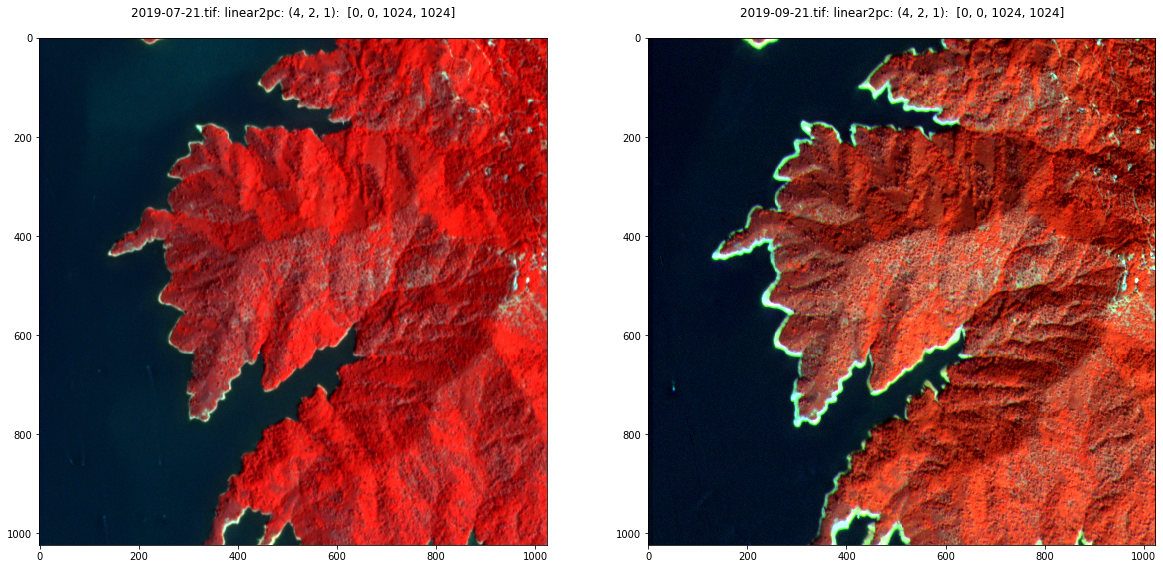

In [23]:
%run scripts/dispms -f /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-21.tif -e 3 -p [4,2,1] \
-F /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-09-21.tif -E 3 -P [4,2,1]

------------IRMAD -------------
Tue Mar 16 10:38:12 2021
first scene:  /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-21.tif
second scene: /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-09-21.tif
rho: [0.99894452 0.9137162  0.74225658 0.61779523]
result written to: /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21.tif
elapsed time: 35.983413219451904


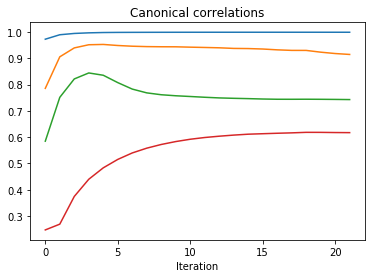

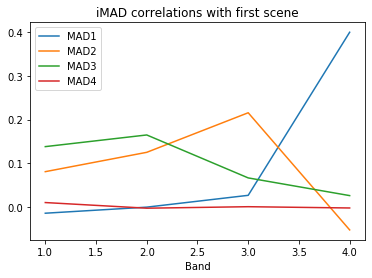

In [24]:
%run scripts/iMad  /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-21.tif \
/media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-09-21.tif

In [25]:
%run scripts/iMadmap /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21.tif 0.0001

change map written to: /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21_cmap.tif


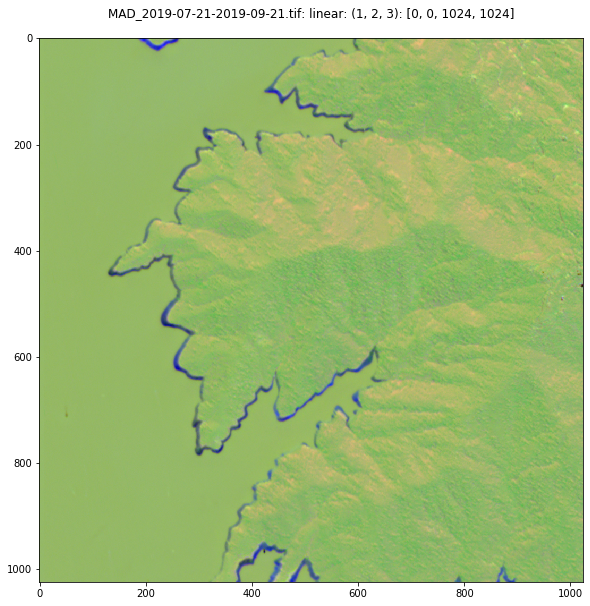

In [26]:
%run scripts/dispms -f /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21.tif \
-e 2 -p [1,2,3]

In [27]:
%run scripts/em -K 2 -p [1,2,3,4] /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21.tif

--------------------------
     EM clustering
--------------------------
infile:   /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21.tif
clusters: 2
T0:       0.500000
beta:     0.500000
scale:    2
running EM on 65536 pixel vectors
em iteration 0: dU: 0.994422 loglike: -54573.048014
em iteration 10: dU: 0.838366 loglike: -2044.811338
em iteration 20: dU: 0.652856 loglike: -1755.736994
em iteration 30: dU: 0.658856 loglike: -1731.446645
em iteration 40: dU: 0.118638 loglike: -1728.345727
em iteration 50: dU: 0.004188 loglike: -1727.955181
running EM on 262144 pixel vectors
em iteration 0: dU: 0.899799 loglike: -68671.697167
running EM on 1048576 pixel vectors
em iteration 0: dU: 0.899938 loglike: -140604.753130
Cluster mean vectors
[[  0.0988556   -0.16177255   0.36839448   0.29674522]
 [ -1.56588946 -23.59431204   5.1869641    5.16759733]]
Cluster covariance matrices
cluster: 0
[[ 1.18860768  1.09609056  1.74826339  0.46659175]
 [ 1.09609056  8.42110017 -0.85779

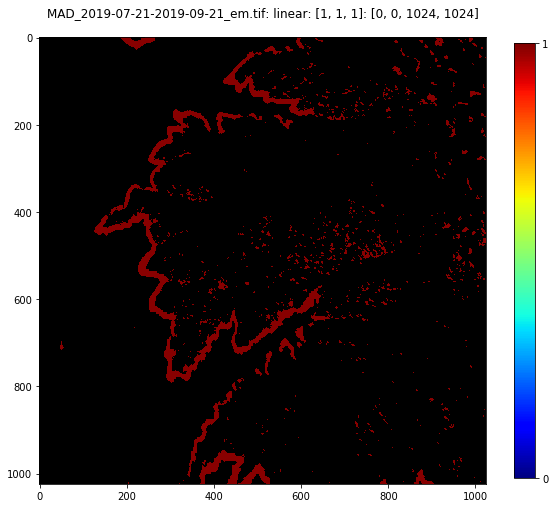

In [28]:
%run scripts/dispms -f /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21_em.tif -c

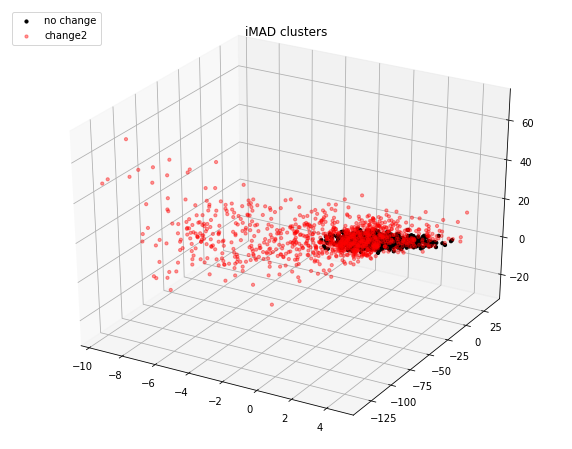

In [29]:
pltclusters('/media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21.tif', 
            '/media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-09-21_em.tif',num = 1000)